In [805]:
# 주피터 nbextensions 생성
# !pip install jupyter_nbextensions_configurator jupyter_contrib_nbextensions
# !jupyter contrib nbextension install --user
# !jupyter nbextensions_configurator enable --user

# 라이브러리

In [806]:
# matplotlib 설치
!pip install koreanize-matplotlib

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [807]:
# 라이브러리
from glob import glob
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import koreanize_matplotlib
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import seaborn as sns

# 데이터 전처리

In [808]:
# 파일 목록
file_name = glob('*.csv')
file_name

['train.csv', 'test.csv', 'sample_submission.csv']

In [809]:
# 데이터 불러오기
train = pd.read_csv(file_name[0])
test = pd.read_csv(file_name[1])
submission = pd.read_csv(file_name[2])

In [810]:
# 불러온 데이터 확인
train

,ID,Exercise_Duration,Body_Temperature(F),BPM,Height(Feet),Height(Remainder_Inches),Weight(lb),Weight_Status,Gender,Age,Calories_Burned
0,TRAIN_0000,26.0,105.6,107.0,5.0,9.0,154.3,Normal Weight,F,45,166.0
1,TRAIN_0001,7.0,103.3,88.0,6.0,6.0,224.9,Overweight,M,50,33.0
2,TRAIN_0002,7.0,103.3,86.0,6.0,3.0,218.3,Overweight,M,29,23.0
3,TRAIN_0003,17.0,104.0,99.0,5.0,6.0,147.7,Normal Weight,F,33,91.0
4,TRAIN_0004,9.0,102.7,88.0,5.0,10.0,169.8,Normal Weight,M,38,32.0
...,...,...,...,...,...,...,...,...,...,...,...
7495,TRAIN_7495,22.0,105.1,104.0,4.0,10.0,112.4,Normal Weight,F,75,151.0
7496,TRAIN_7496,20.0,105.3,104.0,5.0,8.0,147.7,Normal Weight,F,21,114.0
7497,TRAIN_7497,8.0,103.1,90.0,6.0,2.0,202.8,Overweight,M,57,41.0
7498,TRAIN_7498,12.0,104.4,97.0,5.0,9.0,167.6,Overweight,M,35,57.0


In [811]:
# 데이터 타입 확인
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7500 entries, 0 to 7499
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ID                        7500 non-null   object 
 1   Exercise_Duration         7500 non-null   float64
 2   Body_Temperature(F)       7500 non-null   float64
 3   BPM                       7500 non-null   float64
 4   Height(Feet)              7500 non-null   float64
 5   Height(Remainder_Inches)  7500 non-null   float64
 6   Weight(lb)                7500 non-null   float64
 7   Weight_Status             7500 non-null   object 
 8   Gender                    7500 non-null   object 
 9   Age                       7500 non-null   int64  
 10  Calories_Burned           7500 non-null   float64
dtypes: float64(7), int64(1), object(3)
memory usage: 644.7+ KB


## object 타입 처리

In [812]:
# 사용하지 않을 'ID' 제거
train = train.drop(columns='ID').copy()
test = test.drop(columns='ID').copy()

In [813]:
# 'Weight_Status' 의 class 확인 => 크기 비교가 가능하고 class 가 3개니까 OrdinalEncoding 하자
train['Weight_Status'].unique()

array(['Normal Weight', 'Overweight', 'Obese'], dtype=object)

In [814]:
# Encoding 을 하기 위해 'Weight_Status' 의 타입을 'category' 로 변경
train['Weight_Status'] = train['Weight_Status'].astype('category')
test['Weight_Status'] = test['Weight_Status'].astype('category')

In [815]:
# OrdinalEncoder 적용
from sklearn.preprocessing import OrdinalEncoder

oe = OrdinalEncoder(categories=[['Normal Weight', 'Overweight', 'Obese']],
                    handle_unknown='use_encoded_value',
                    unknown_value=-1)

train['Weight_Status'] = oe.fit_transform(np.array(train['Weight_Status']).reshape(-1, 1)) # reshape(-1, 1) 을 통해 1차원 배열을 열 벡터(2차원 배열)로 변환 (-1은 자동으로 크기를 조정하는 의미를 가지며, 1은 새로운 배열의 차원을 1로 지정하는 것을 의미)
test['Weight_Status'] = oe.transform(np.array(test['Weight_Status']).reshape(-1, 1))

In [816]:
# 확인
train['Weight_Status'].unique()

array([0., 1., 2.])

In [817]:
# binary class 인 'Gender' 인코딩
train = pd.get_dummies(train).copy()
test = pd.get_dummies(test).copy()

In [818]:
# 확인
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7500 entries, 0 to 7499
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Exercise_Duration         7500 non-null   float64
 1   Body_Temperature(F)       7500 non-null   float64
 2   BPM                       7500 non-null   float64
 3   Height(Feet)              7500 non-null   float64
 4   Height(Remainder_Inches)  7500 non-null   float64
 5   Weight(lb)                7500 non-null   float64
 6   Weight_Status             7500 non-null   float64
 7   Age                       7500 non-null   int64  
 8   Calories_Burned           7500 non-null   float64
 9   Gender_F                  7500 non-null   uint8  
 10  Gender_M                  7500 non-null   uint8  
dtypes: float64(8), int64(1), uint8(2)
memory usage: 542.1 KB


## 컬럼 정리

In [819]:
# 컬럼 확인
train.columns

Index(['Exercise_Duration', 'Body_Temperature(F)', 'BPM', 'Height(Feet)',
       'Height(Remainder_Inches)', 'Weight(lb)', 'Weight_Status', 'Age',
       'Calories_Burned', 'Gender_F', 'Gender_M'],
      dtype='object')

In [820]:
# 컬럼 순서 정리
train = train[['Exercise_Duration', 'Body_Temperature(F)', 'BPM', 'Height(Feet)',
               'Height(Remainder_Inches)', 'Weight(lb)', 'Weight_Status', 'Age',
               'Gender_F', 'Gender_M', 'Calories_Burned']].copy()

test = test[['Exercise_Duration', 'Body_Temperature(F)', 'BPM', 'Height(Feet)',
               'Height(Remainder_Inches)', 'Weight(lb)', 'Weight_Status', 'Age',
               'Gender_F', 'Gender_M']].copy()

In [821]:
# 컬럼명 한글화
kor_cols = {
    'Exercise_Duration' : '운동시간',
    'Body_Temperature(F)' : '체온(화씨)',
    'BPM' : '심박수',
    'Height(Feet)' : '신장(피트)',
    'Height(Remainder_Inches)' : '신장(나머지인치)',
    'Weight(lb)' : '몸무게(파운드)',
    'Weight_Status' : '비만정도',
    'Age' : '나이',
    'Gender_F' : '여성',
    'Gender_M' : '남성',
    'Calories_Burned' : '칼로리소모량'
}

In [822]:
# 컬럼명 한글로 변경
train = train.rename(columns=kor_cols).copy()
test = test.rename(columns=kor_cols).copy()

In [823]:
# 확인
train.head()

,운동시간,체온(화씨),심박수,신장(피트),신장(나머지인치),몸무게(파운드),비만정도,나이,여성,남성,칼로리소모량
0,26.0,105.6,107.0,5.0,9.0,154.3,0.0,45,1,0,166.0
1,7.0,103.3,88.0,6.0,6.0,224.9,1.0,50,0,1,33.0
2,7.0,103.3,86.0,6.0,3.0,218.3,1.0,29,0,1,23.0
3,17.0,104.0,99.0,5.0,6.0,147.7,0.0,33,1,0,91.0
4,9.0,102.7,88.0,5.0,10.0,169.8,0.0,38,0,1,32.0


## 도메인 지식 활용을 위해 SI단위로 변환

In [824]:
# 체온 F -> C 변환
train['체온(화씨)'] = train['체온(화씨)'].map(lambda x: (x-32)*5/9).copy()
test['체온(화씨)'] = test['체온(화씨)'].map(lambda x: (x-32)*5/9).copy()

# 컬럼명 변경
train = train.rename(columns={'체온(화씨)' : '체온'}).copy()
test = test.rename(columns={'체온(화씨)' : '체온'}).copy()

In [825]:
# 신장 피트와 인치 -> cm 변환
train['신장(피트)'] = train['신장(피트)'].map(lambda x: x/3.281*100).copy()
train['신장(나머지인치)'] = train['신장(나머지인치)'].map(lambda x: x/39.37*100).copy()

test['신장(피트)'] = test['신장(피트)'].map(lambda x: x/3.281*100).copy()
test['신장(나머지인치)'] = test['신장(나머지인치)'].map(lambda x: x/39.37*100).copy()

# 하나로 합치기
train['신장(피트)'] = (train['신장(피트)'] + train['신장(나머지인치)']).copy()
test['신장(피트)'] = (test['신장(피트)'] + test['신장(나머지인치)']).copy()

# 컬럼 정리
train = train.rename(columns={'신장(피트)' : '신장'}).drop(columns='신장(나머지인치)').copy()
test = test.rename(columns={'신장(피트)' : '신장'}).drop(columns='신장(나머지인치)').copy()

In [826]:
# 몸무게 lb -> kg 변환
train['몸무게(파운드)'] = train['몸무게(파운드)'].map(lambda x: x/2.205).copy()
test['몸무게(파운드)'] = test['몸무게(파운드)'].map(lambda x: x/2.205).copy()

# 컬럼명 변경
train = train.rename(columns={'몸무게(파운드)' : '몸무게'}).copy()
test = test.rename(columns={'몸무게(파운드)' : '몸무게'}).copy()

In [827]:
# 확인
train.head()

,운동시간,체온,심박수,신장,몸무게,비만정도,나이,여성,남성,칼로리소모량
0,26.0,40.888889,107.0,175.252609,69.977324,0.0,45,1,0,166.0
1,7.0,39.611111,88.0,198.111106,101.995465,1.0,50,0,1,33.0
2,7.0,39.611111,86.0,190.491091,99.002268,1.0,29,0,1,23.0
3,17.0,40.000000,99.0,167.632594,66.984127,0.0,33,1,0,91.0
4,9.0,39.277778,88.0,177.792614,77.006803,0.0,38,0,1,32.0


In [828]:
# 확인
test.head()

,운동시간,체온,심박수,신장,몸무게,비만정도,나이,여성,남성
0,26.0,40.611111,107.0,154.932568,51.972789,0.0,45,1,0
1,29.0,40.500000,111.0,187.951086,89.977324,1.0,21,0,1
2,11.0,40.000000,90.0,175.252609,77.006803,0.0,58,0,1
3,24.0,40.777778,108.0,182.872624,88.979592,1.0,35,0,1
4,29.0,41.111111,116.0,170.172599,66.984127,0.0,67,1,0


# EDA

In [829]:
# 기술통계
train.describe()

,운동시간,체온,심박수,신장,몸무게,비만정도,나이,여성,남성,칼로리소모량
count,7500.0000,7500.000000,7500.000000,7500.000000,7500.000000,7500.000000,7500.000000,7500.000000,7500.000000,7500.000000
mean,15.5012,40.018652,95.498133,174.498350,74.993735,0.403200,42.636000,0.502533,0.497467,89.373467
std,8.3553,0.784914,9.587331,14.317660,15.105730,0.543448,16.883188,0.500027,0.500027,62.817086
min,1.0000,37.111111,69.000000,121.914051,36.009070,0.000000,20.000000,0.000000,0.000000,1.000000
25%,8.0000,39.611111,88.000000,165.092589,62.993197,0.000000,28.000000,0.000000,0.000000,35.000000
50%,15.0000,40.222222,95.000000,175.252609,73.968254,0.000000,39.000000,1.000000,0.000000,77.000000
75%,23.0000,40.611111,103.000000,185.411081,86.984127,1.000000,56.000000,1.000000,1.000000,138.000000
max,30.0000,41.500000,128.000000,218.429599,131.972789,2.000000,79.000000,1.000000,1.000000,300.000000


* 이상치
    * max: 체온이 너무 높다?
    * min: 신장 121? 몸무게 36?    

In [830]:
# 신장 130 이하면 이상치일까? => 3행
train[train['신장'] < 130]

,운동시간,체온,심박수,신장,몸무게,비만정도,나이,여성,남성,칼로리소모량
1506,25.0,40.722222,104.0,126.994061,39.002268,0.0,30,1,0,156.0
2017,29.0,40.777778,102.0,126.994061,40.000000,0.0,58,1,0,189.0
4532,9.0,39.888889,97.0,121.914051,40.000000,1.0,63,1,0,55.0


In [831]:
test[test['신장'] < 130]

,운동시간,체온,심박수,신장,몸무게,비만정도,나이,여성,남성


In [832]:
# 몸무게가 40 이하면 이상치일까? => 5행
train[train['몸무게'] < 40]

,운동시간,체온,심박수,신장,몸무게,비만정도,나이,여성,남성,칼로리소모량
1506,25.0,40.722222,104.0,126.994061,39.002268,0.0,30,1,0,156.0
2875,6.0,39.111111,90.0,134.614076,39.002268,0.0,35,1,0,29.0
3243,5.0,39.222222,91.0,132.074071,36.009070,0.0,26,1,0,24.0
5154,30.0,40.500000,112.0,132.074071,38.004535,0.0,35,1,0,216.0
6896,4.0,39.111111,86.0,132.074071,38.004535,0.0,27,1,0,17.0


In [833]:
test[test['몸무게'] < 40]

,운동시간,체온,심박수,신장,몸무게,비만정도,나이,여성,남성
4509,17.0,40.388889,98.0,134.614076,38.004535,0.0,59,1,0
5410,22.0,40.722222,103.0,134.614076,38.004535,0.0,27,1,0


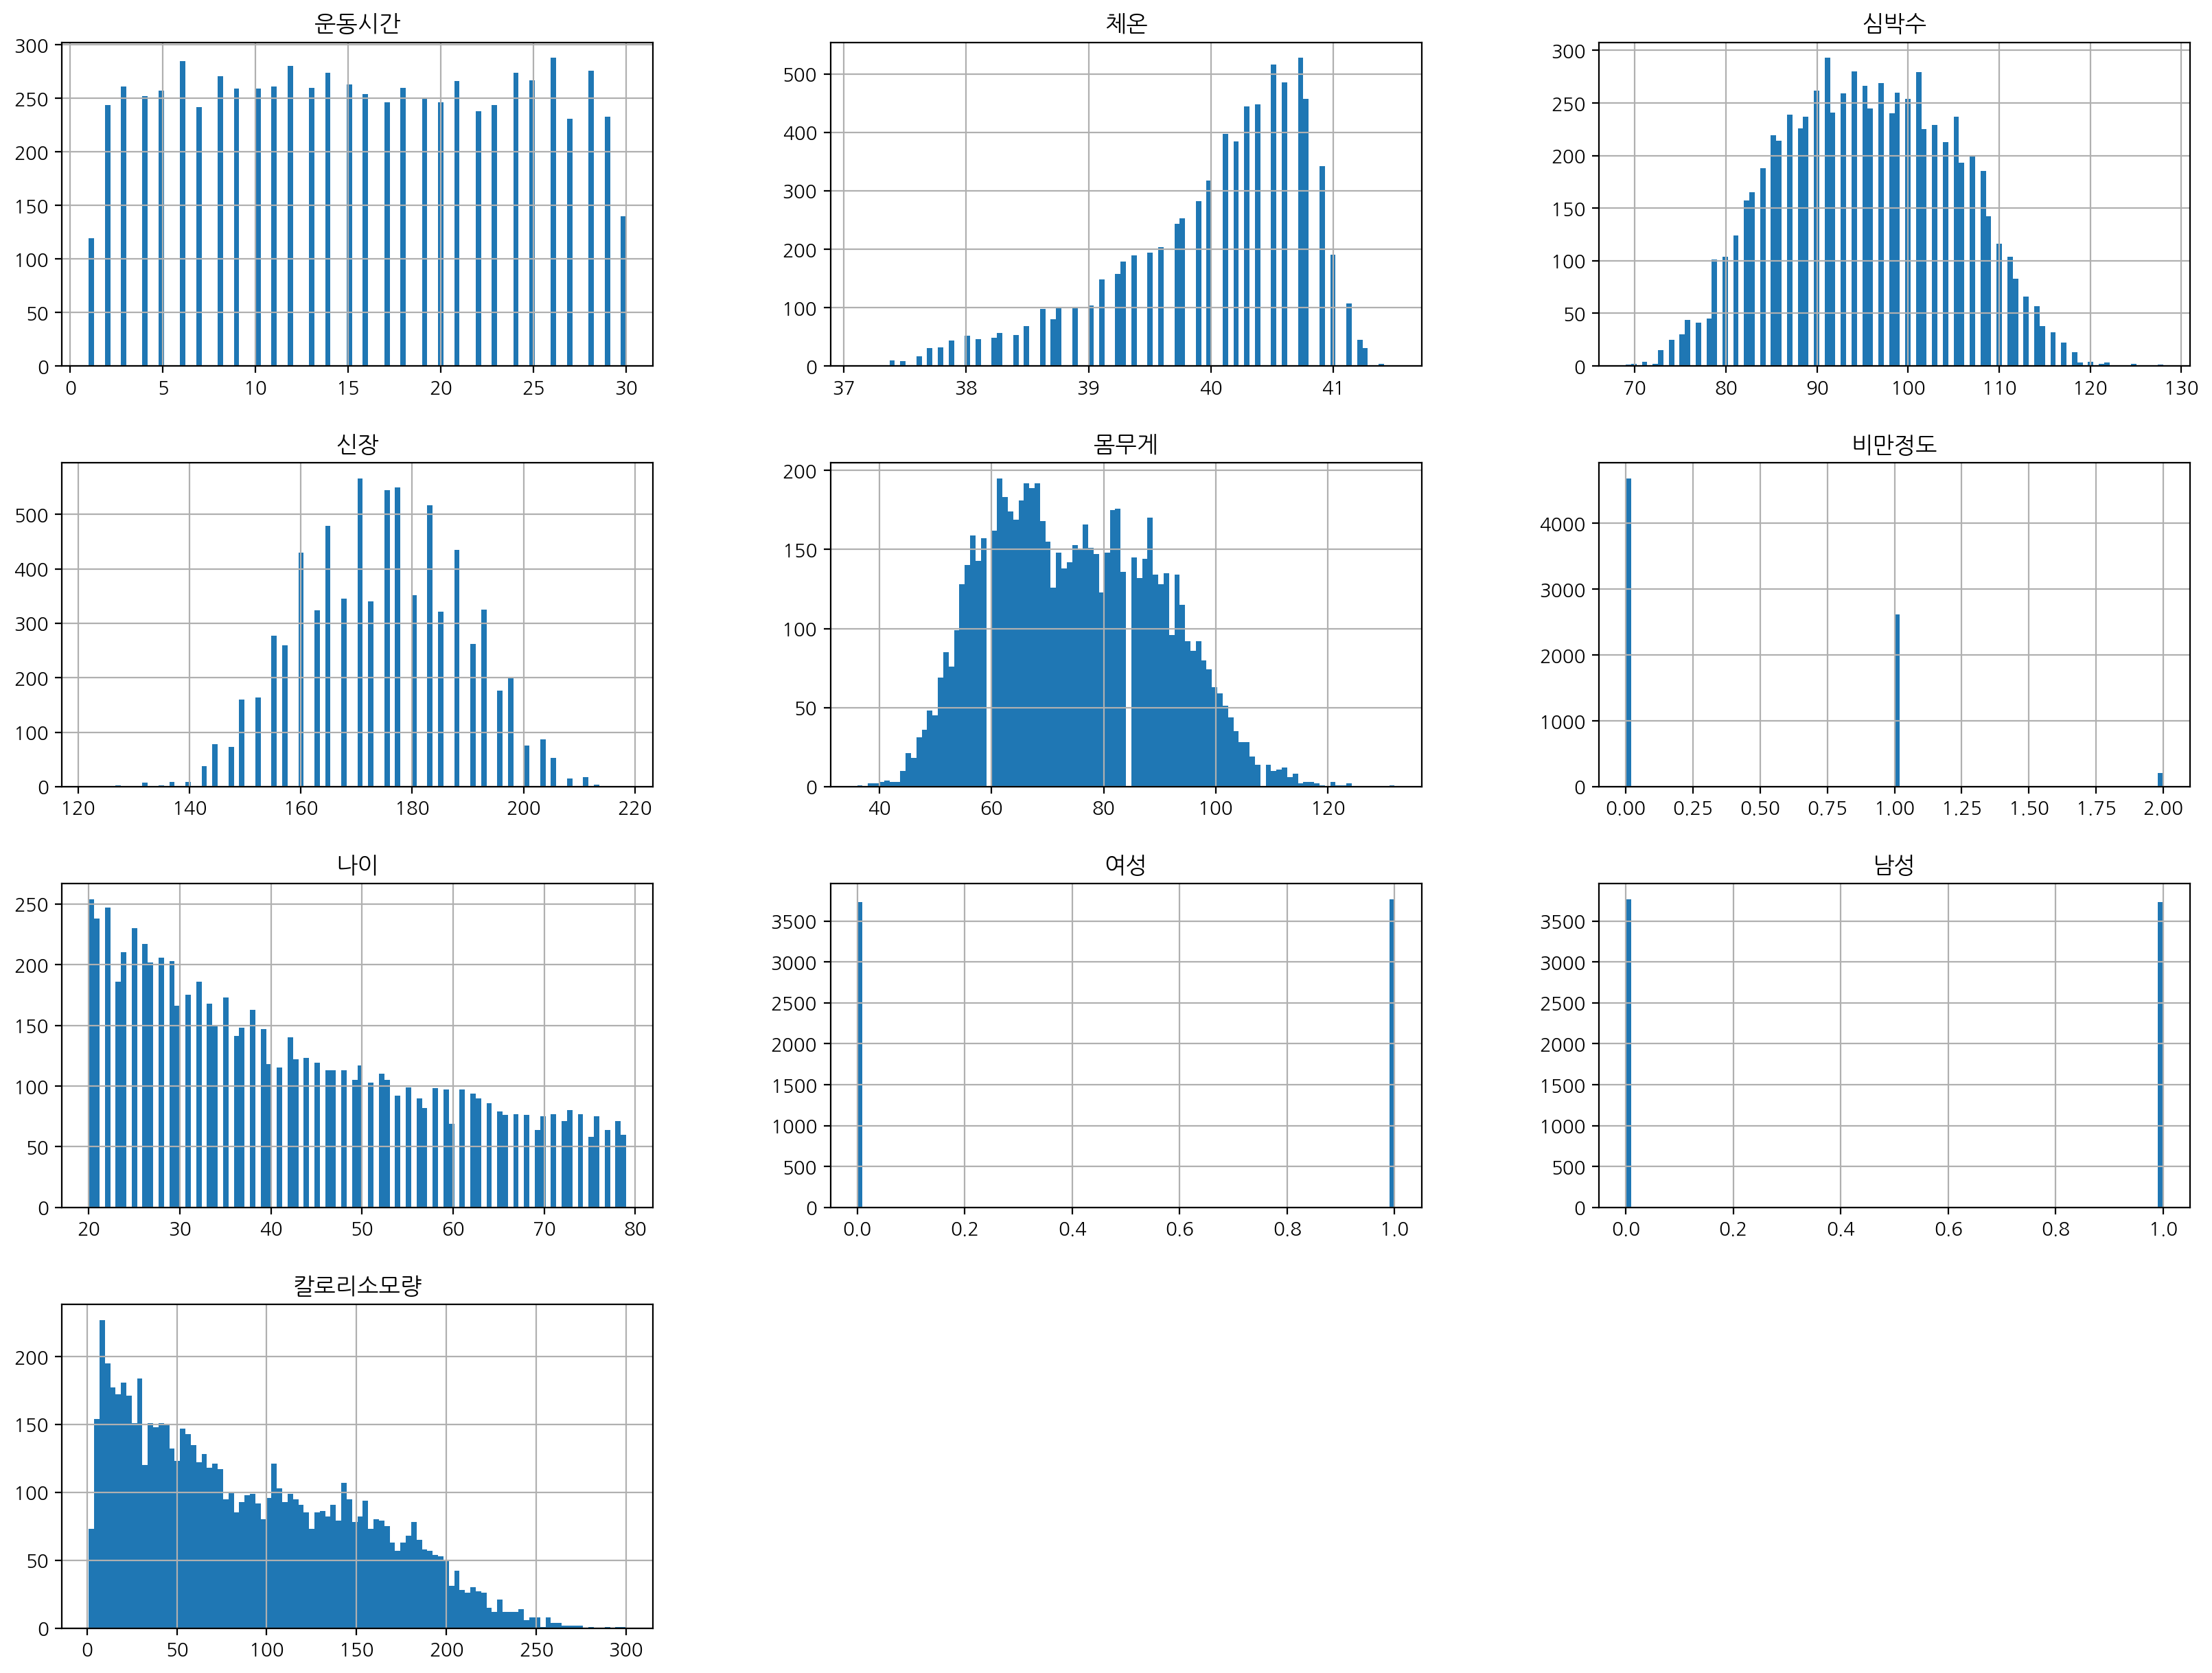

In [834]:
# 히스토그램
train.hist(bins=100, figsize=(20, 15));

* 전체적으로 정규화? => batchnormalization 으로 되겠지
    * 체온 label_smoothing?
    * 신장, 나이, 구간화
    * 칼로리소모량 label_smoothing 적용, 제출 전 되돌리기

* 특별히 이상치는 모르겠다.
    * 신장에 특정 키들이 빈도수가 높다
    * 비만정도 2인 값의 수가 많이 적은듯   

In [835]:
# 상관 관계
train.corr().style.background_gradient(axis=0)

,운동시간,체온,심박수,신장,몸무게,비만정도,나이,여성,남성,칼로리소모량
운동시간,1.000000,0.904314,0.853489,-0.003146,0.002236,0.015547,0.017734,-0.007789,0.007789,0.954783
체온,0.904314,1.000000,0.770707,0.002979,0.007554,0.014376,0.016474,-0.012012,0.012012,0.824379
심박수,0.853489,0.770707,1.000000,0.006319,0.012562,0.021080,0.014702,-0.016898,0.016898,0.899900
신장,-0.003146,0.002979,0.006319,1.000000,0.957815,0.407672,0.011183,-0.704117,0.704117,0.021906
몸무게,0.002236,0.007554,0.012562,0.957815,1.000000,0.564964,0.090536,-0.779709,0.779709,0.042568
비만정도,0.015547,0.014376,0.021080,0.407672,0.564964,1.000000,0.163474,-0.548964,0.548964,0.060046
나이,0.017734,0.016474,0.014702,0.011183,0.090536,0.163474,1.000000,-0.006035,0.006035,0.159624
여성,-0.007789,-0.012012,-0.016898,-0.704117,-0.779709,-0.548964,-0.006035,1.000000,-1.000000,-0.027619
남성,0.007789,0.012012,0.016898,0.704117,0.779709,0.548964,0.006035,-1.000000,1.000000,0.027619
칼로리소모량,0.954783,0.824379,0.899900,0.021906,0.042568,0.060046,0.159624,-0.027619,0.027619,1.000000


* 심박수, 체온과 강한 상관 관계를 갖는다
* 다중공선성
    * 운동시간과 [체온, 심박수] 는 다중공선성
    * 신장과 [몸무게, 비만정도, 남성] 도 다중공선성

In [836]:
# '비만정도' 2의 빈도수가 엄청 적네? => 확인 결과: 205행으로 무시 못함 => SMOTE 써볼까?
train[train['비만정도']==2].count()

운동시간      205
체온        205
심박수       205
신장        205
몸무게       205
비만정도      205
나이        205
여성        205
남성        205
칼로리소모량    205
dtype: int64

# 피처 엔지니어링

## 파생 변수 만들기

In [837]:
# # 나이대 만들기
# def ages(x):
#     y = x // 10
#     return y * 10

# train['나이대'] = train['나이'].map(ages)
# test['나이대'] = test['나이'].map(ages)

In [838]:
# # 나이 대신 나이대 사용해서 돌려보기
# train = train.drop(columns='나이').copy()
# test = test.drop(columns='나이').copy()
# # => 점수는 비슷

In [839]:
# 신체대사율 만들기
train['신체대사율'] = train['체온'] * train['심박수']
test['신체대사율'] = test['체온'] * test['심박수']

In [840]:
# BMI 만들기
train['BMI'] = train['몸무게'] / (train['신장']/100 * train['신장']/100)
test['BMI'] = test['몸무게'] / (test['신장']/100 * test['신장']/100)

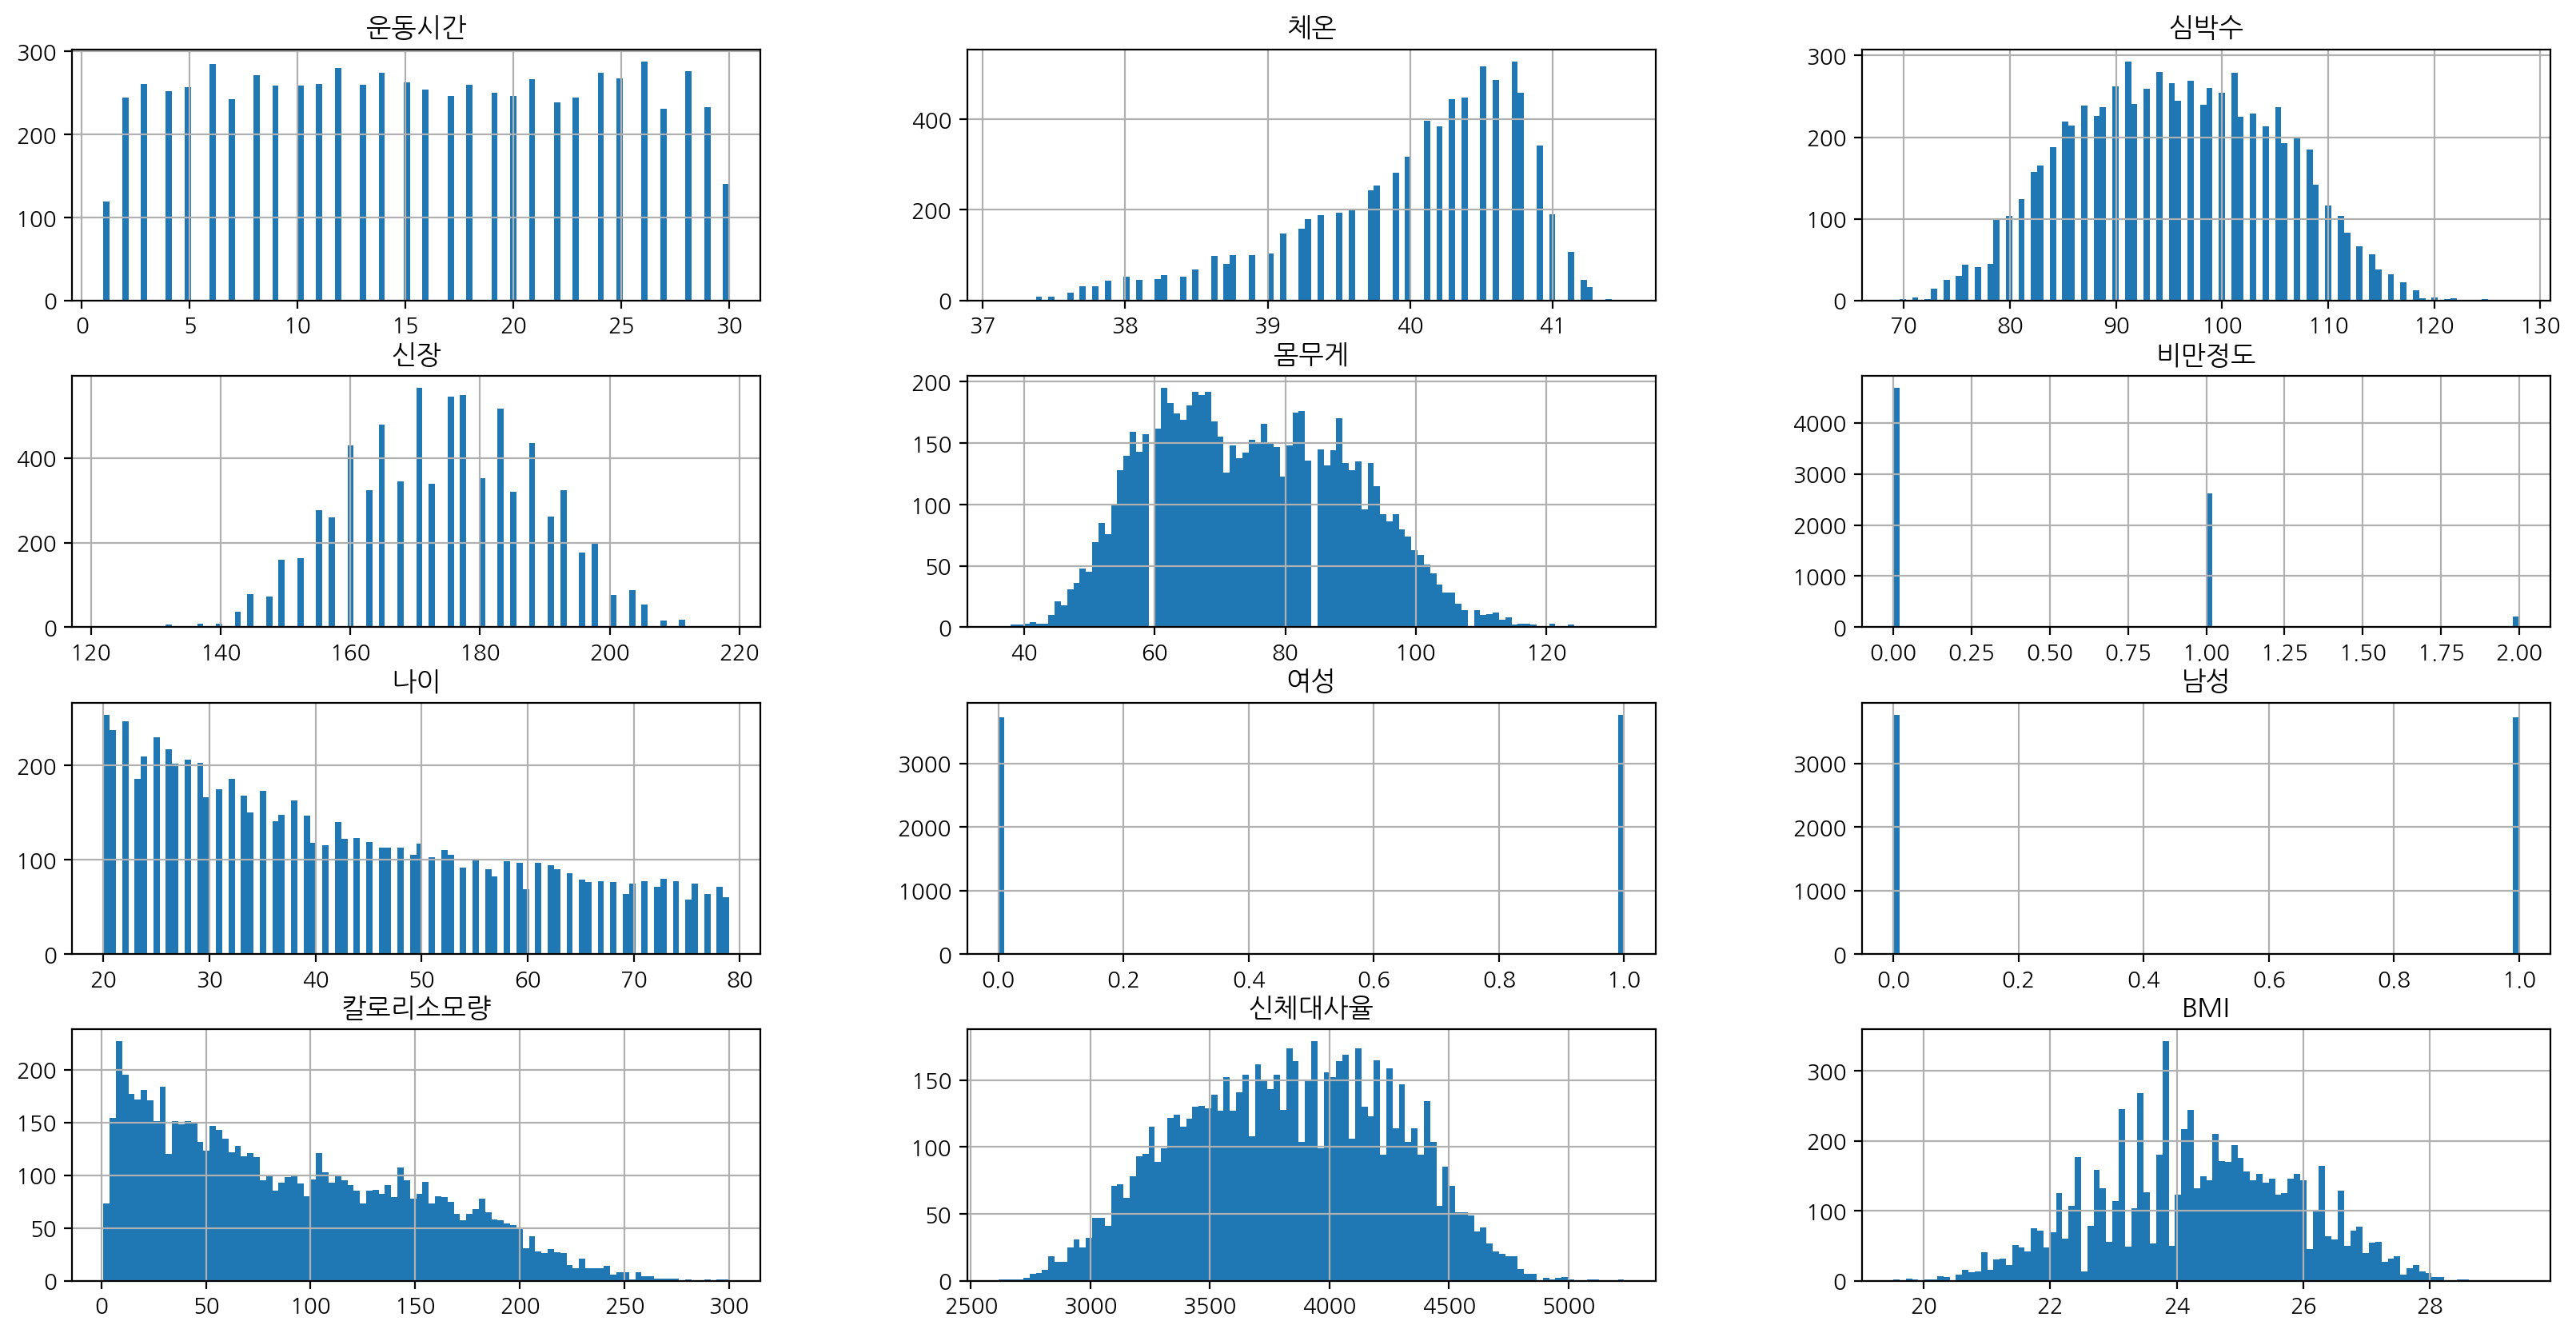

In [841]:
train.hist(bins=100, figsize=(20, 10));

* BMI 양 끝쪽에 이상치들이 보인다

## 이상치 중앙값으로 대체

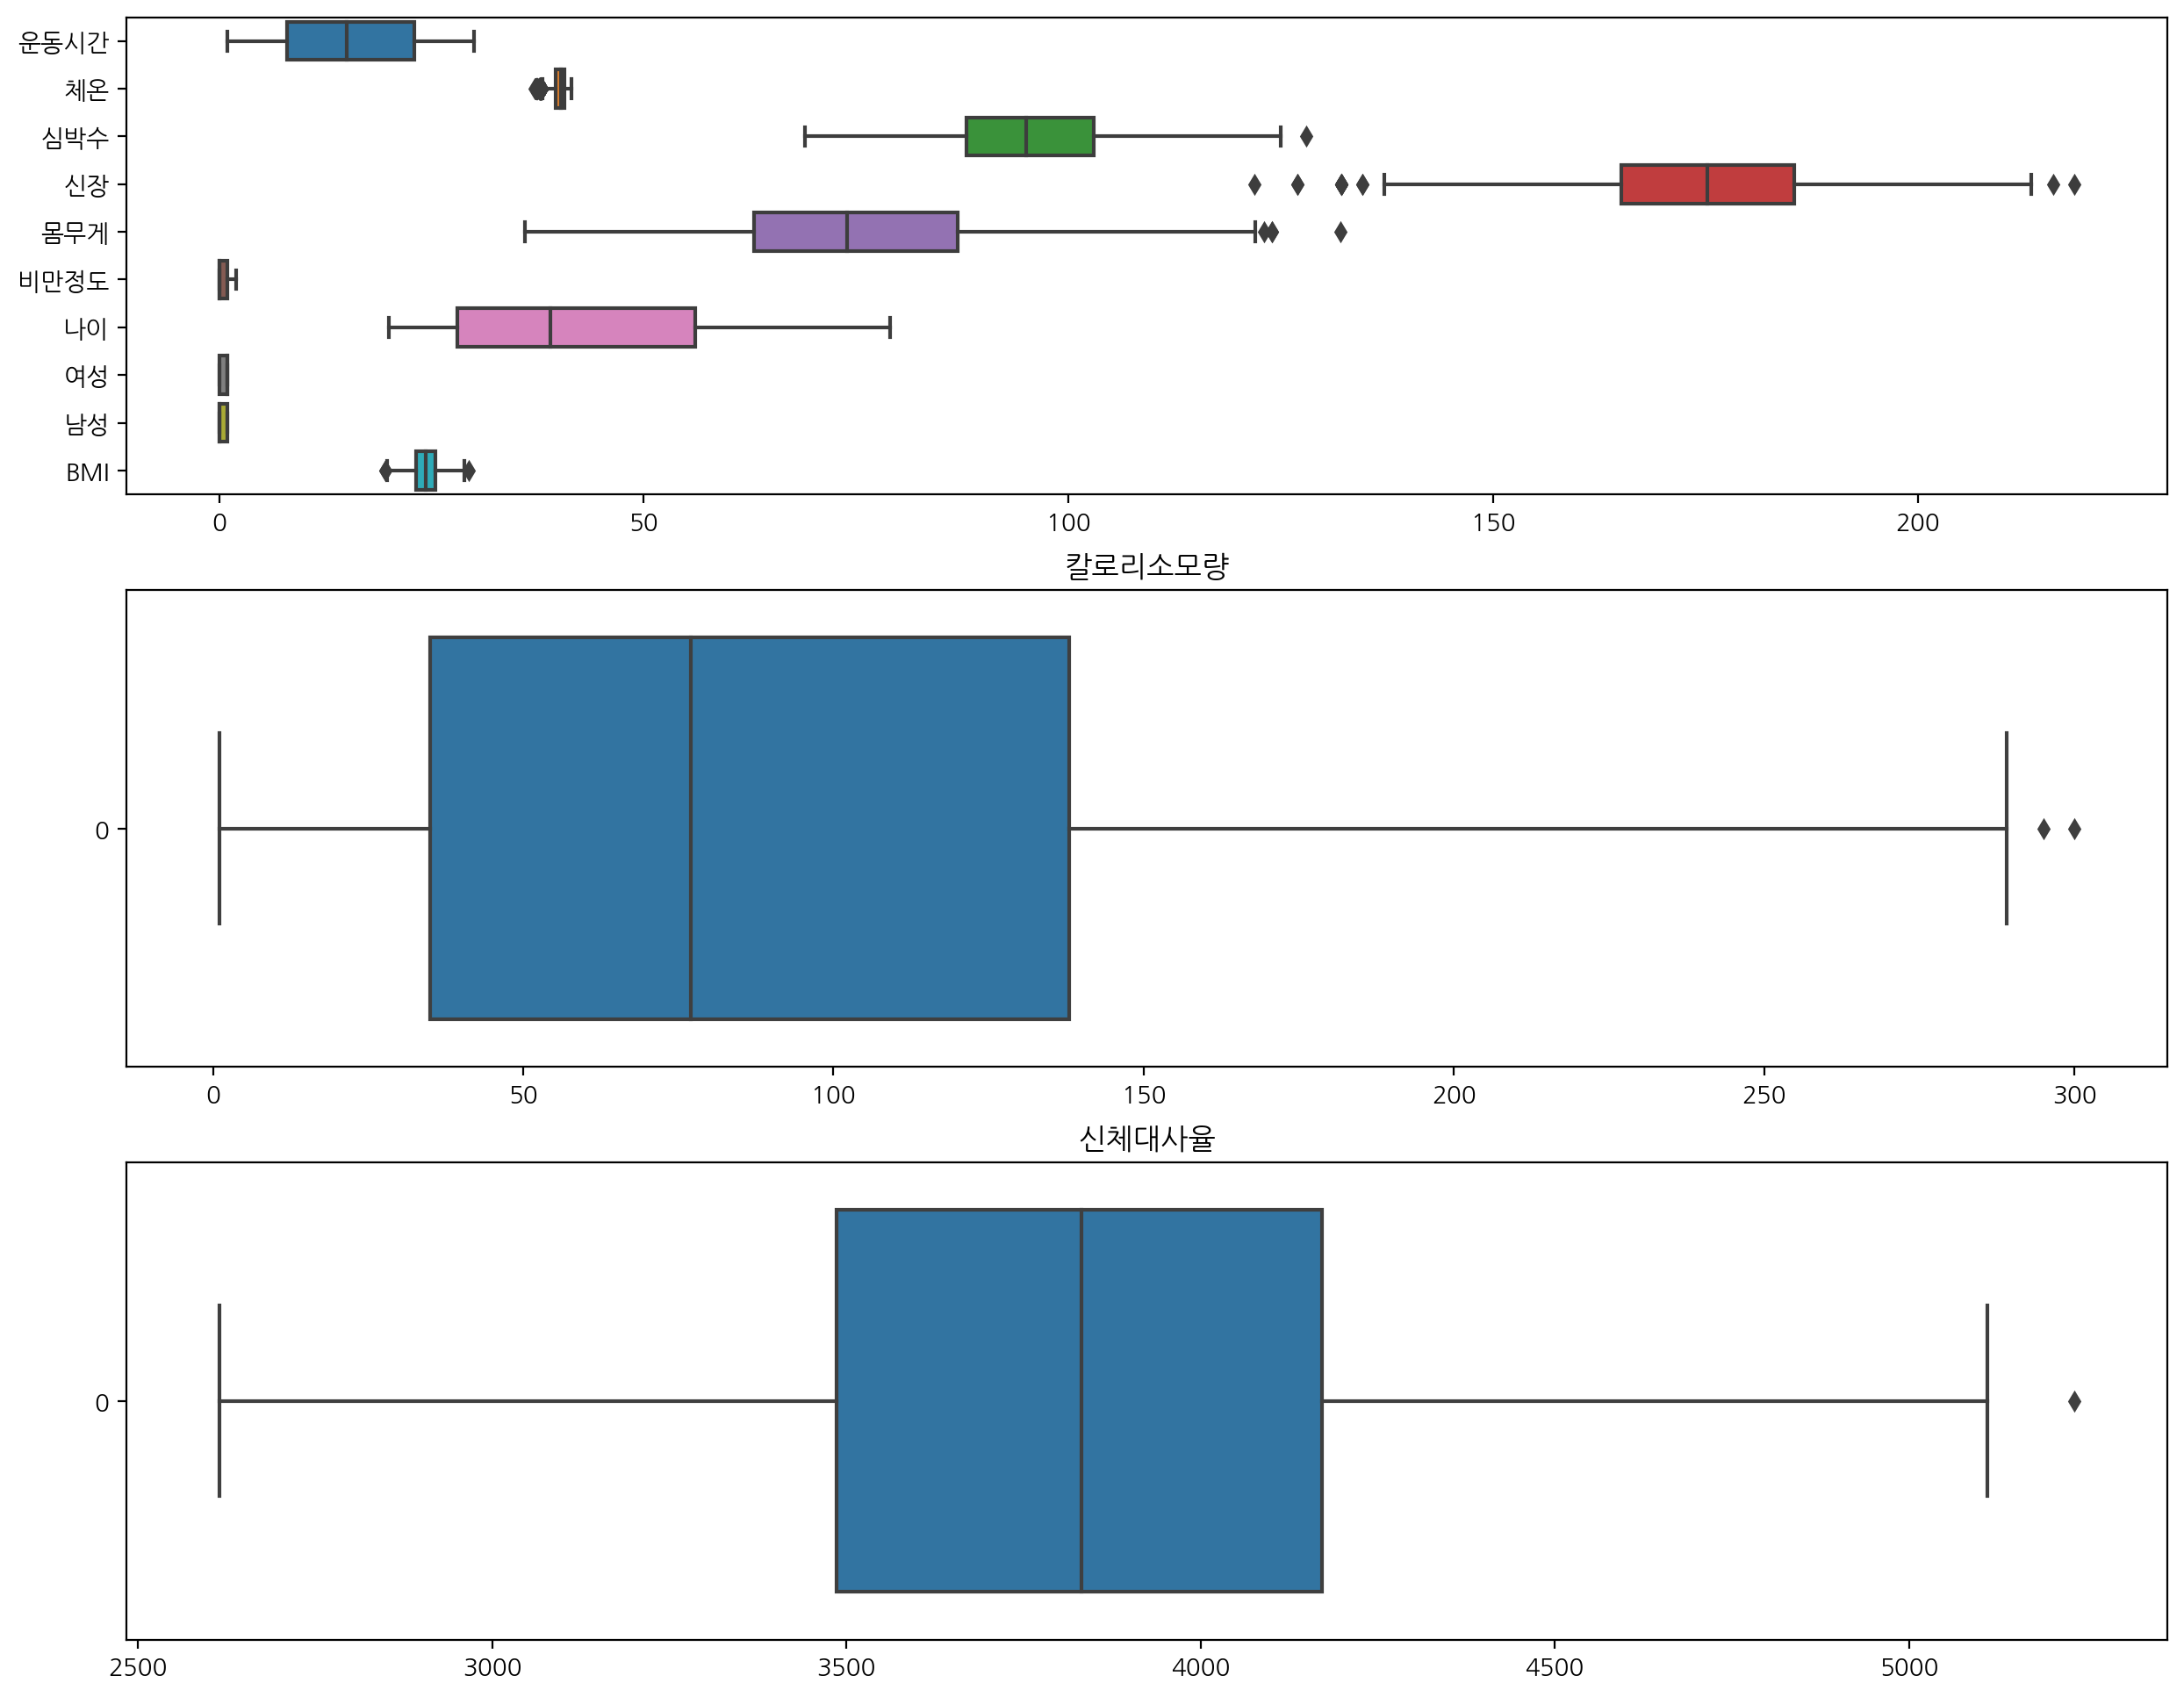

In [842]:
# 이상치 확인
f, ax = plt.subplots(nrows=3, ncols=1, figsize=(15, 12))

sns.boxplot(data=train.drop(columns=['칼로리소모량', '신체대사율']), ax=ax[0], orient='h')
sns.boxplot(data=train['칼로리소모량'], ax=ax[1], orient='h')
ax[1].set_title('칼로리소모량')
sns.boxplot(data=train['신체대사율'], ax=ax[2], orient='h')
ax[2].set_title('신체대사율');

* 크게 눈에 띄는 이상치는 없지만 중앙값으로 대체해 보기

In [843]:
# # 체온 이상치 중앙값으로 대체
# # train
# temp_min_outline = (train['체온'].quantile(0.25) - (train['체온'].quantile(0.75) - train['체온'].quantile(0.25)) * 1.50)
# temp_max_outline = (train['체온'].quantile(0.75) + (train['체온'].quantile(0.75) - train['체온'].quantile(0.25)) * 1.50)
# temp_median = train['체온'].median()

# train.loc[train['체온'] < temp_min_outline, '체온'] = temp_median
# train.loc[train['체온'] > temp_max_outline, '체온'] = temp_median

# # test


In [844]:
# # 심박수 이상치 중앙값으로 대체
# # train
# heart_rate_min_outline = (train['심박수'].quantile(0.25) - (train['심박수'].quantile(0.75) - train['심박수'].quantile(0.25)) * 1.50)
# heart_rate_max_outline = (train['심박수'].quantile(0.75) + (train['심박수'].quantile(0.75) - train['심박수'].quantile(0.25)) * 1.50)
# heart_rate_median = train['심박수'].median()

# train.loc[train['심박수'] < heart_rate_min_outline, '심박수'] = heart_rate_median
# train.loc[train['심박수'] > heart_rate_max_outline, '심박수'] = heart_rate_median

# # test


In [845]:
# # 신장 이상치 중앙값으로 대체
# # train
# height_min_outline = (train['신장'].quantile(0.25) - (train['신장'].quantile(0.75) - train['신장'].quantile(0.25)) * 1.50)
# height_max_outline = (train['신장'].quantile(0.75) + (train['신장'].quantile(0.75) - train['신장'].quantile(0.25)) * 1.50)
# height_median = train['신장'].median()

# train.loc[train['신장'] < height_min_outline, '신장'] = height_median
# train.loc[train['신장'] > height_max_outline, '신장'] = height_median

# # test


In [846]:
# # 몸무게 이상치 중앙값으로 대체
# # train
# weight_min_outline = (train['몸무게'].quantile(0.25) - (train['몸무게'].quantile(0.75) - train['몸무게'].quantile(0.25)) * 1.50)
# weight_max_outline = (train['몸무게'].quantile(0.75) + (train['몸무게'].quantile(0.75) - train['몸무게'].quantile(0.25)) * 1.50)
# weight_median = train['몸무게'].median()

# train.loc[train['몸무게'] < weight_min_outline, '몸무게'] = weight_median
# train.loc[train['몸무게'] > weight_max_outline, '몸무게'] = weight_median

# # test


In [847]:
# # 칼로리소모량 이상치 중앙값으로 대체
# # train
# calorie_min_outline = (train['칼로리소모량'].quantile(0.25) - (train['칼로리소모량'].quantile(0.75) - train['칼로리소모량'].quantile(0.25)) * 1.50)
# calorie_max_outline = (train['칼로리소모량'].quantile(0.75) + (train['칼로리소모량'].quantile(0.75) - train['칼로리소모량'].quantile(0.25)) * 1.50)
# calorie_median = train['칼로리소모량'].median()

# train.loc[train['칼로리소모량'] < calorie_min_outline, '칼로리소모량'] = calorie_median
# train.loc[train['칼로리소모량'] > calorie_max_outline, '칼로리소모량'] = calorie_median

In [848]:
# # BMI 이상치 중앙값으로 대체
# # train
# bmi_min_outline = (train['BMI'].quantile(0.25) - (train['BMI'].quantile(0.75) - train['BMI'].quantile(0.25)) * 1.50)
# bmi_max_outline = (train['BMI'].quantile(0.75) + (train['BMI'].quantile(0.75) - train['BMI'].quantile(0.25)) * 1.50)
# bmi_median = train['BMI'].median()

# train.loc[train['BMI'] < bmi_min_outline, 'BMI'] = bmi_median
# train.loc[train['BMI'] > bmi_max_outline, 'BMI'] = bmi_median

# # test


In [849]:
# # 확인
# f, ax = plt.subplots(nrows=3, ncols=1, figsize=(15, 12))

# sns.boxplot(data=train.drop(columns=['칼로리소모량', '신체대사율']), ax=ax[0], orient='h')
# sns.boxplot(data=train['칼로리소모량'], ax=ax[1], orient='h')
# ax[1].set_title('칼로리소모량')
# sns.boxplot(data=train['신체대사율'], ax=ax[2], orient='h')
# ax[2].set_title('신체대사율');

## Label Smoothing (정규분포화)

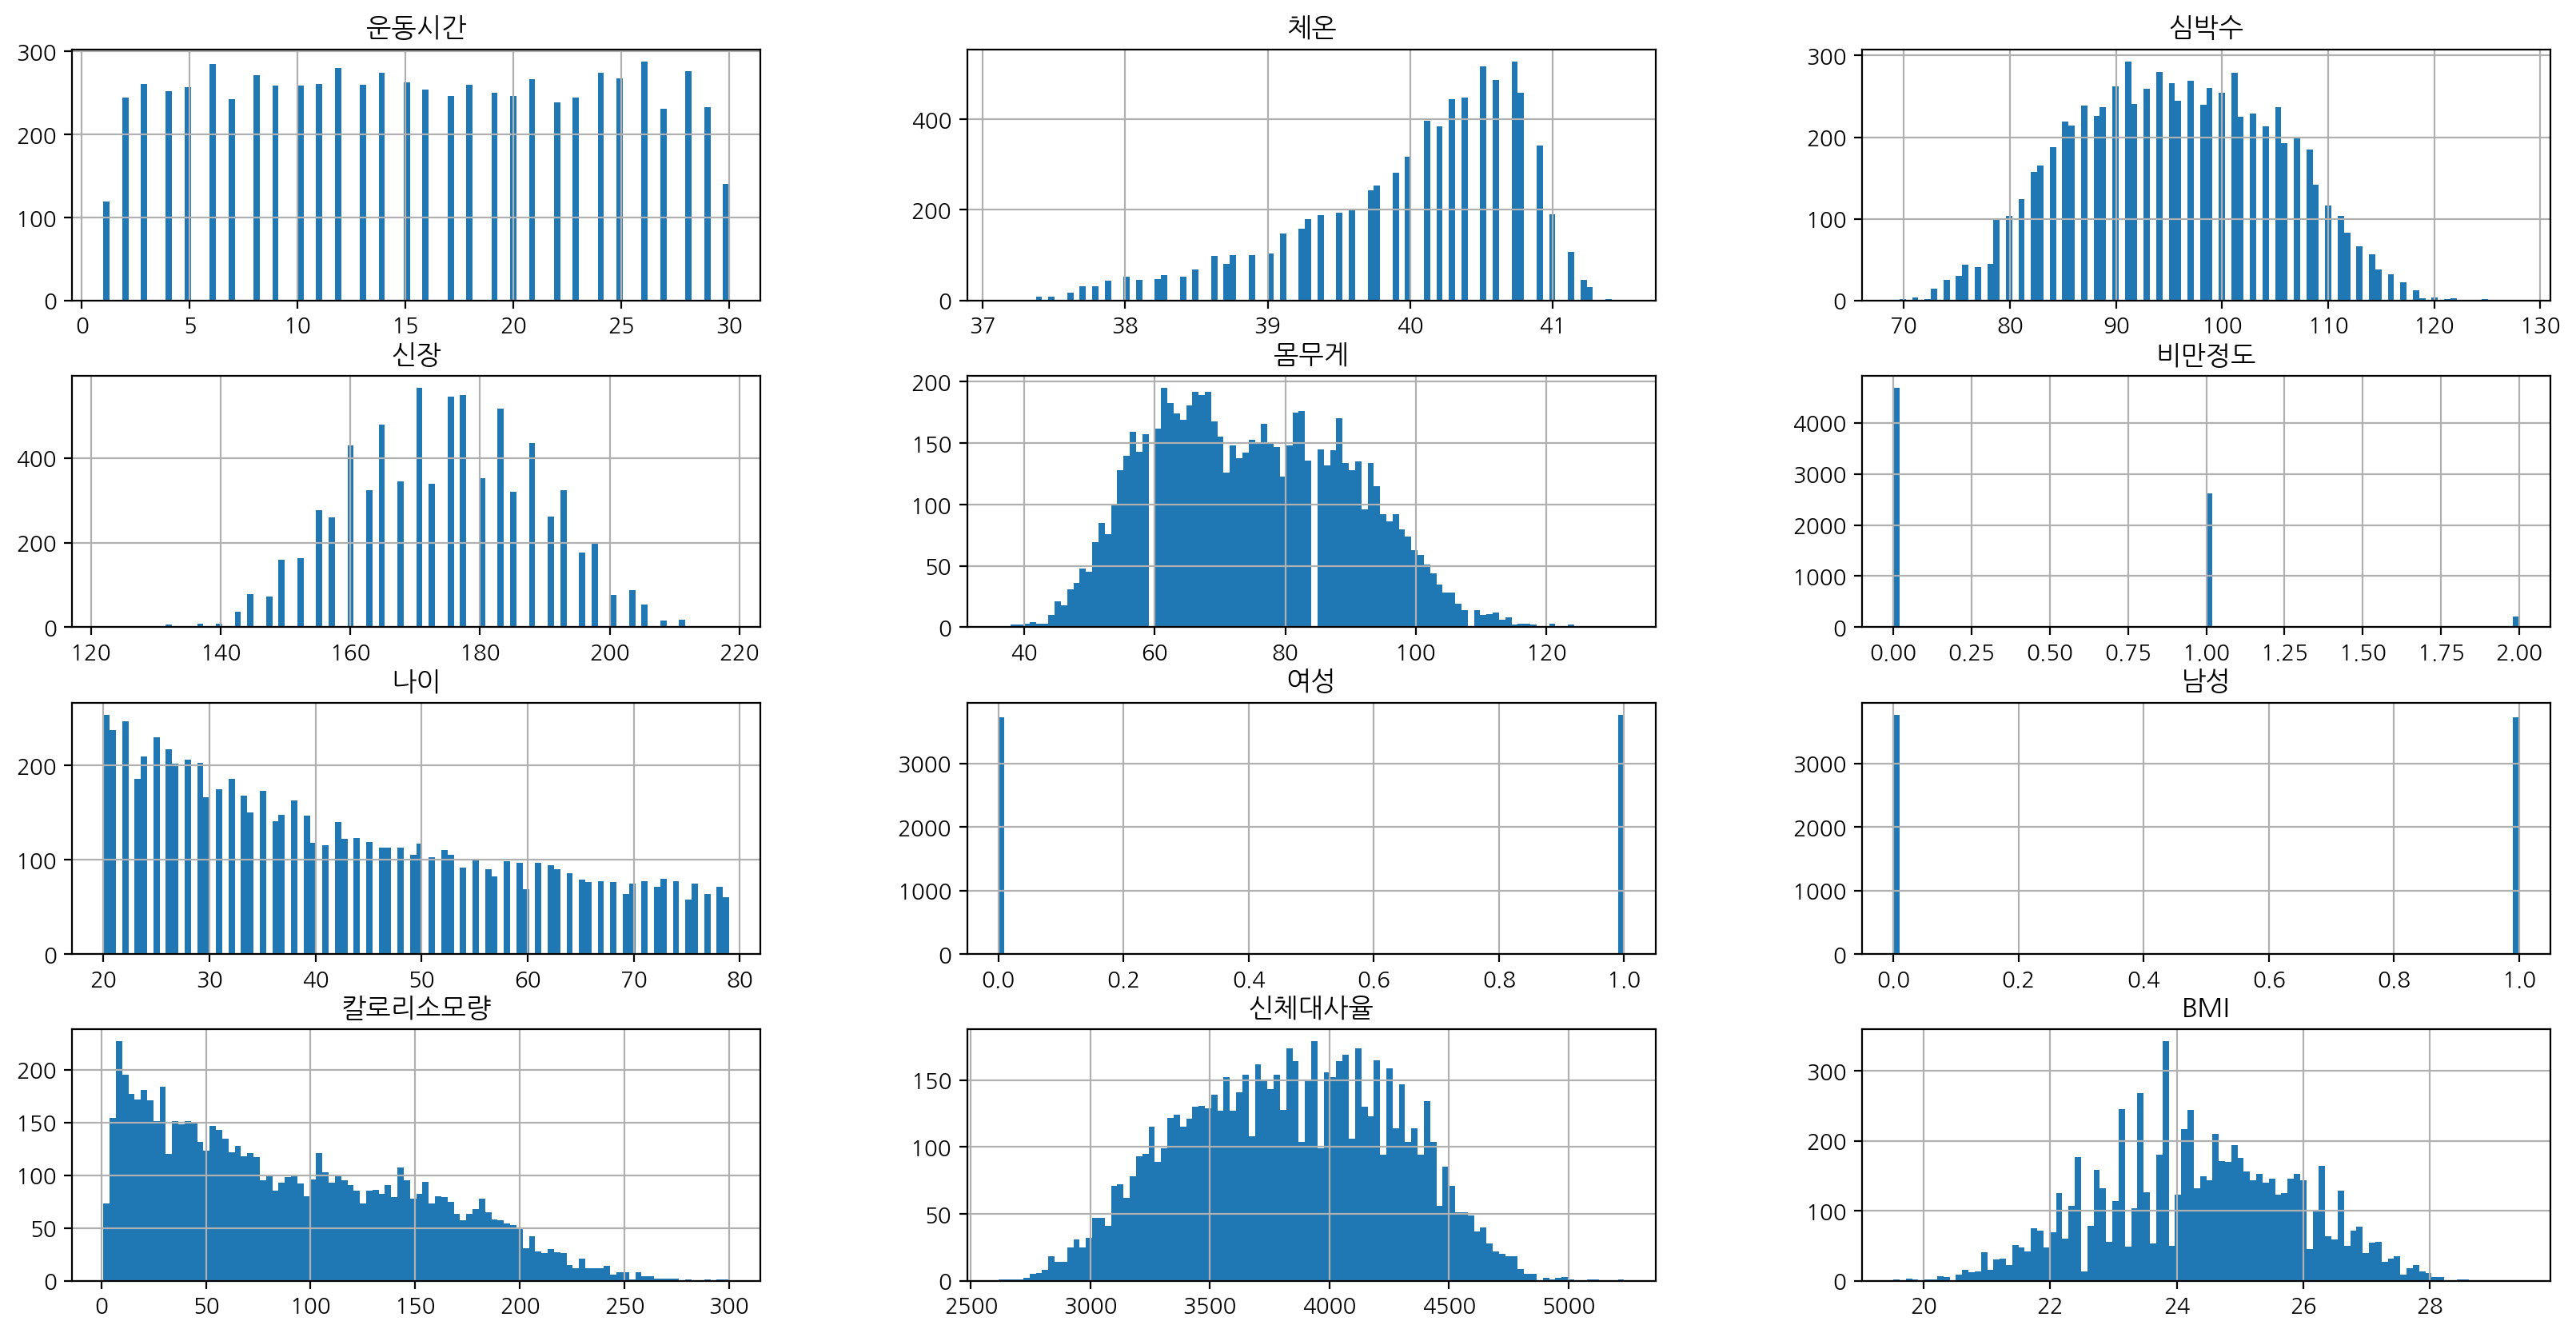

In [850]:
# label smoothing 으로 정규분포화 하기
train.hist(bins=100, figsize=(20, 10));

In [851]:
# Log scaling
# train['나이스log1p'] = np.log1p(train['나이'])

In [852]:
# Root square
# train['나이루트스퀘어'] = np.sqrt(train['나이']

In [853]:
# 확인
# train.hist(bins=100, figsize=(20, 10));
# => 정규 분포형태로 변하지 않는다..

## SMOTE 기법 적용해 보기

In [854]:
# # 비만정도 불균형에 SMOTE 기법 적용해 보기
# from imblearn.over_sampling import SMOTE

# X = train.drop(columns='비만정도')
# y = train['비만정도']

# sm = SMOTE(random_state=42)
# X_over, y_over = sm.fit_resample(X, y)

# train = pd.concat([X_over, y_over], axis=1)

## 사용할 피처 선택

In [855]:
# 컬럼 확인
train.columns

Index(['운동시간', '체온', '심박수', '신장', '몸무게', '비만정도', '나이', '여성', '남성', '칼로리소모량',
       '신체대사율', 'BMI'],
      dtype='object')

In [856]:
# 컬럼 순서 정리
train = train[['운동시간', '체온', '심박수', '신장', '몸무게', '비만정도', '나이', '여성', '남성', '신체대사율', 'BMI', '칼로리소모량']].copy()

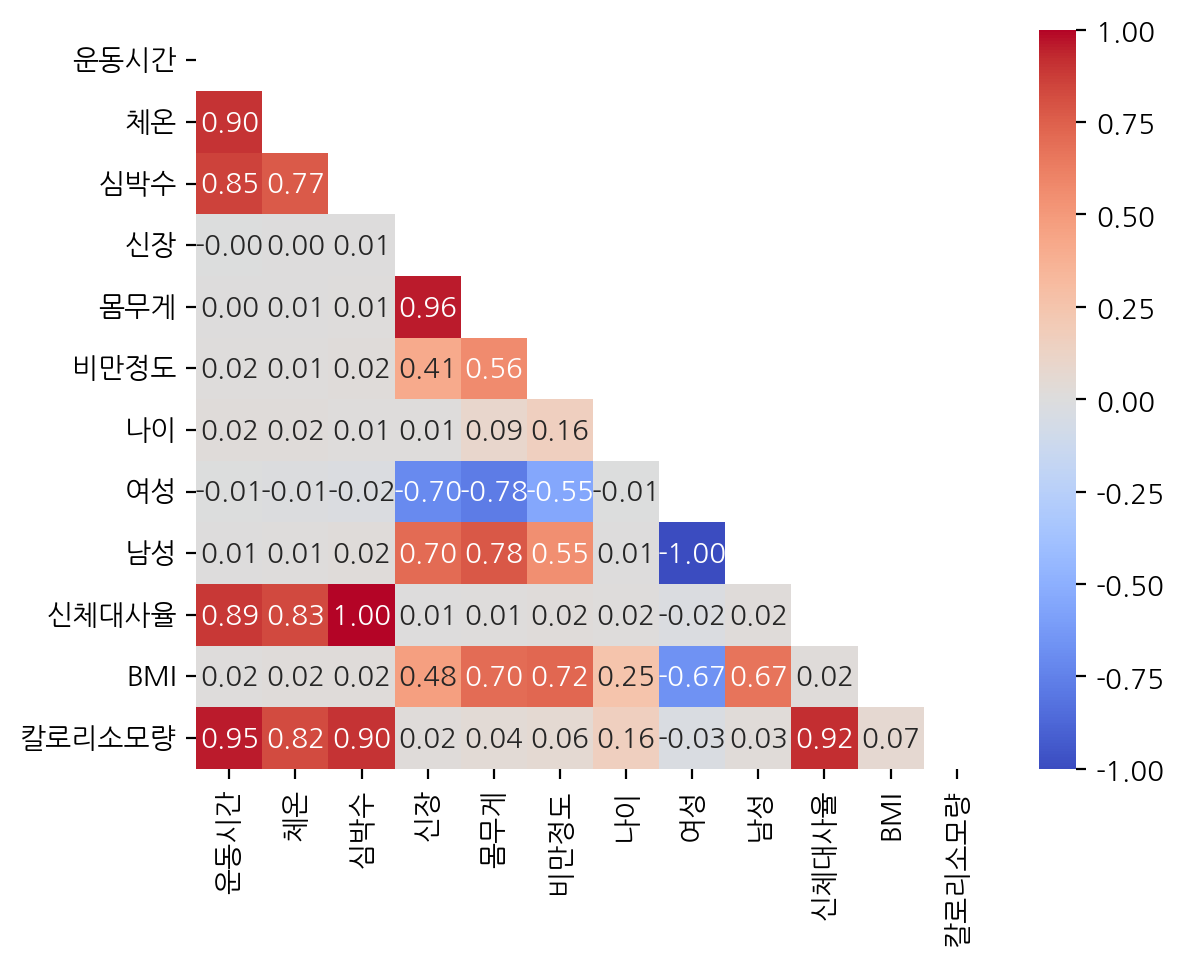

In [857]:
# 상관 관계
mask = np.triu(np.ones_like(train.corr()))
sns.heatmap(train.corr(), annot=True, fmt='.2f', mask=mask, vmin=-1, vmax=1, cmap='coolwarm');

In [858]:
# 사용할 피처 고르기
train = train[['운동시간', '몸무게', 'BMI', '심박수', '나이', '여성', '신체대사율', '칼로리소모량']].copy()
test = test[['운동시간', '몸무게', 'BMI', '심박수', '나이', '여성', '신체대사율']].copy()

# 머신러닝, 딥러닝

## 데이터 분리

In [859]:
# 종속변수 지정
label_name = '칼로리소모량'
X = train.drop(columns=label_name).copy()
y = train[label_name].copy()

In [860]:
from sklearn.model_selection import train_test_split

# train_test_split?
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=42)

X_train.shape, X_valid.shape, y_train.shape, y_valid.shape

((6000, 7), (1500, 7), (6000,), (1500,))

In [861]:
X_test = test.copy()

In [862]:
X_test.shape

(7500, 7)

## 머신러닝 lgbm 으로 해보기

In [863]:
# lgbm 은 한글 컬럼을 지원하지 않는다.. 다시 영문화
eng_cols = {
    '운동시간' : 'exercise_time',
    '체온' : 'temperature',
    '심박수' : 'heart_rate',
    '신장' : 'height',
    '몸무게' : 'weight',
    '비만정도' : 'obesity',
    '나이' : 'age',
    '나이대' : 'ages',
    '여성' : 'female',
    '남성' : 'male',
    '칼로리소모량' : 'calorie',
    '신체대사율' : 'metabolic_rate'
}

In [864]:
# 컬럼명 영문으로 변경
X_train = X_train.rename(columns=eng_cols).copy()
y_train = y_train.rename(eng_cols).copy()
X_test = X_test.rename(columns=eng_cols).copy()

In [ ]:
# lightgbm
import lightgbm

model_lgbm = lightgbm.LGBMRegressor(# max_depth=-1,
                                    random_state=42,
                                    n_jobs=-1,                                    
                                    silent=True)

In [ ]:
# RandomizedSearchCV
from sklearn.model_selection import RandomizedSearchCV

param_distributions = {'learning_rate': np.arange(0.001, 0.01, 0.001),
                       'n_estimators': range(100, 1100, 100)
#                        'subsample': np.arange(0.5, 1.0, 0.1)
                      }

rscv = RandomizedSearchCV(estimator=model_lgbm,
                          param_distributions=param_distributions,
                          n_iter=30,
                          scoring='neg_root_mean_squared_error',
                          n_jobs=-1,
                          cv=5,
                          verbose=2,
                          random_state=42)

rscv.fit(X_train, y_train)

In [ ]:
# 각 파라미터마다의 순위
pd.DataFrame(rscv.cv_results_).sort_values(by='rank_test_score')

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,param_learning_rate,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
21,3.088413,0.621476,0.110638,0.011378,1000,0.007,"{'n_estimators': 1000, 'learning_rate': 0.007}",-2.652058,-2.451308,-2.394681,-2.698576,-2.528917,-2.545108,0.115481,1
13,1.913175,0.150932,0.063333,0.013817,700,0.009,"{'n_estimators': 700, 'learning_rate': 0.00900...",-2.795853,-2.561746,-2.505065,-2.797376,-2.681643,-2.668337,0.119254,2
22,1.938711,0.042148,0.061618,0.011066,700,0.008,"{'n_estimators': 700, 'learning_rate': 0.008}",-3.002839,-2.732619,-2.683144,-2.966778,-2.845963,-2.846269,0.125350,3
27,2.468644,0.111859,0.076158,0.010693,800,0.007,"{'n_estimators': 800, 'learning_rate': 0.007}",-2.989130,-2.731388,-2.682063,-2.992116,-2.836753,-2.846290,0.128010,4
18,3.190719,0.418677,0.102025,0.012658,1000,0.005,"{'n_estimators': 1000, 'learning_rate': 0.005}",-3.217959,-2.933224,-2.915160,-3.204485,-3.077926,-3.069751,0.128627,5
26,2.272781,0.147261,0.058573,0.007635,700,0.007,"{'n_estimators': 700, 'learning_rate': 0.007}",-3.262679,-2.997739,-2.967585,-3.259334,-3.123360,-3.122139,0.124850,6
29,1.547252,0.524255,0.041606,0.011191,600,0.008,"{'n_estimators': 600, 'learning_rate': 0.008}",-3.322160,-3.052152,-3.013857,-3.288194,-3.190272,-3.173327,0.123083,7
7,1.974161,0.420919,0.050194,0.009952,600,0.007,"{'n_estimators': 600, 'learning_rate': 0.007}",-3.748005,-3.446385,-3.433483,-3.701399,-3.620734,-3.590001,0.129184,8
12,2.007415,0.254079,0.056025,0.007391,700,0.006,"{'n_estimators': 700, 'learning_rate': 0.006}",-3.752816,-3.453363,-3.423376,-3.697050,-3.638949,-3.593111,0.131719,9
6,3.048522,0.895026,0.100346,0.015434,1000,0.004,"{'n_estimators': 1000, 'learning_rate': 0.004}",-3.955456,-3.628148,-3.608136,-3.876703,-3.836667,-3.781022,0.138519,10


In [ ]:
# 성능이 가장 좋은 모델의 파라미터
best_model = rscv.best_estimator_
best_model

LGBMRegressor(learning_rate=0.007, n_estimators=1000, random_state=42)

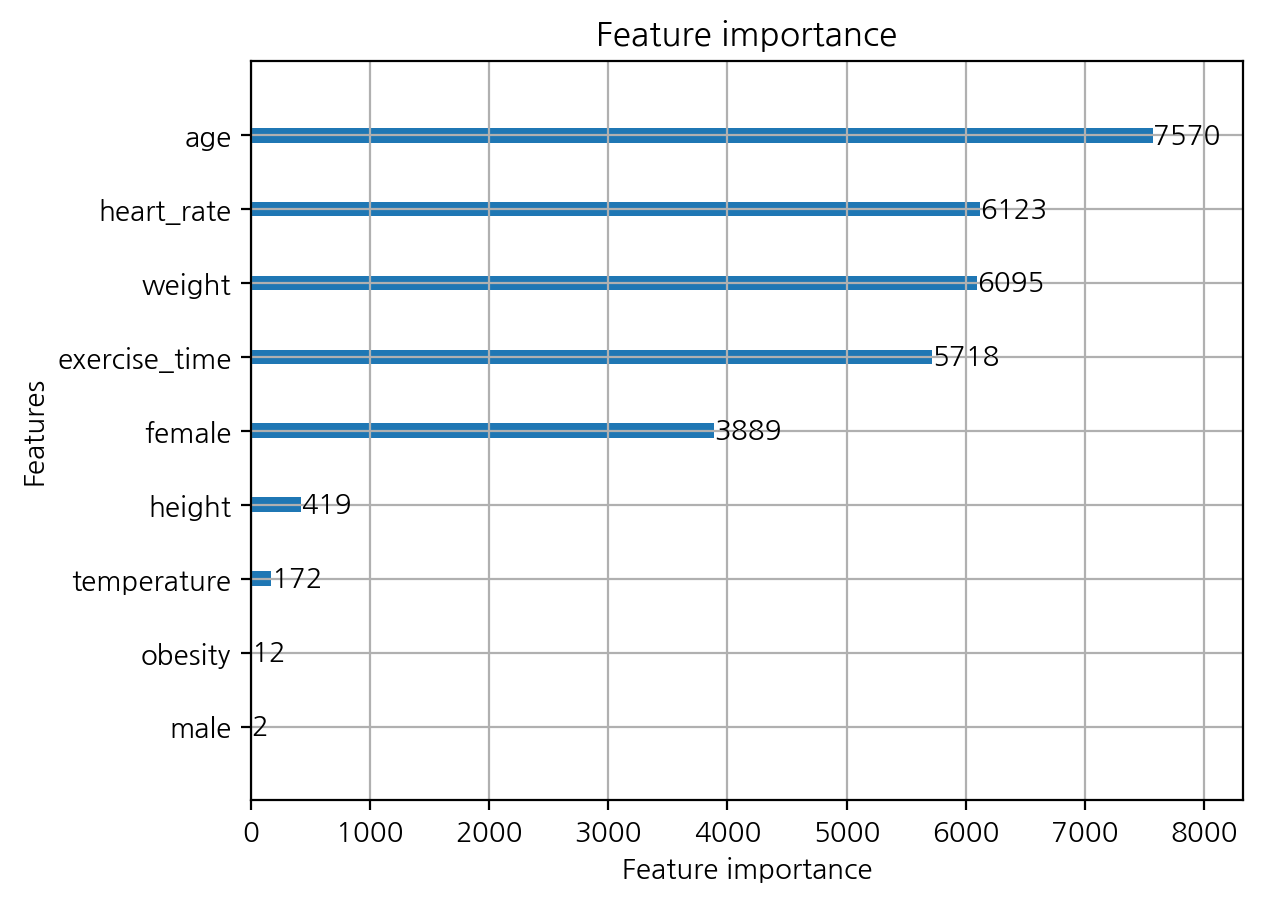

In [ ]:
# feature_importance_
lightgbm.plot_importance(best_model);

In [ ]:
# valid 안 해봤지만.. 바로 X_test
y_predict = best_model.predict(X_test)

In [ ]:
# OMR 카드 작성
submission['Calories_Burned'] = y_predict

In [ ]:
# 제출
submission.to_csv('sub1_lgbm.csv',index=False)

## 딥러닝 tensorflow 로 해보기

In [305]:
# tensorflow 불러오기
! pip install tensorflow
import tensorflow as tf

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [865]:
# input_shape 맞춰주기
input_shape = X_train.shape[1]

In [866]:
# 모델 생성
model = tf.keras.models.Sequential([
    tf.keras.layers.BatchNormalization(input_shape=[input_shape]),
    # tf.keras.layers.Dense(units=128, activation='gelu'),
    tf.keras.layers.Dense(units=64, activation='gelu'),
    tf.keras.layers.Dense(units=16, activation='gelu'),
    # tf.keras.layers.Dropout(0.05),
    # tf.keras.layers.Dense(units=8, activation='gelu'),
    tf.keras.layers.Dense(units=1)
])

In [867]:
# compile 하기 전에 optimizer 중에서 loss 의 경사하강법 중의 하나인 adam 으로 설정
optimizer = tf.keras.optimizers.Adam(
    learning_rate=0.001, # beta_1=0.9, beta_2=0.8, decay=True, ,
    name='Adam'
)

model.compile(optimizer=optimizer,
              loss='mse',
              metrics=[tf.keras.metrics.RootMeanSquaredError()]
)

In [868]:
# 요약..
model.summary()

Model: "sequential_23"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 batch_normalization_23 (Bat  (None, 7)                28        
 chNormalization)                                                
                                                                 
 dense_85 (Dense)            (None, 64)                512       
                                                                 
 dense_86 (Dense)            (None, 16)                1040      
                                                                 
 dense_87 (Dense)            (None, 1)                 17        
                                                                 
Total params: 1,597
Trainable params: 1,583
Non-trainable params: 14
_________________________________________________________________


In [869]:
# 시간 절약하기 위해 early_stop 설정
early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=300)

# 학습, 평가
history = model.fit(X_train, y_train, epochs=5000,
                    validation_data=(X_valid, y_valid),
                    callbacks=[early_stop], verbose=1)

Epoch 1/5000
188/188 [==============================] - 2s 4ms/step - loss: 9332.1758 - root_mean_squared_error: 96.6032 - val_loss: 1766.1737 - val_root_mean_squared_error: 42.0259
Epoch 2/5000
188/188 [==============================] - 1s 3ms/step - loss: 722.4979 - root_mean_squared_error: 26.8793 - val_loss: 429.4843 - val_root_mean_squared_error: 20.7240
Epoch 3/5000
188/188 [==============================] - 1s 3ms/step - loss: 422.8884 - root_mean_squared_error: 20.5642 - val_loss: 188.8307 - val_root_mean_squared_error: 13.7416
Epoch 4/5000
188/188 [==============================] - 1s 3ms/step - loss: 319.1982 - root_mean_squared_error: 17.8661 - val_loss: 133.5889 - val_root_mean_squared_error: 11.5581
Epoch 5/5000
188/188 [==============================] - 1s 3ms/step - loss: 264.1557 - root_mean_squared_error: 16.2529 - val_loss: 88.8215 - val_root_mean_squared_error: 9.4245
Epoch 6/5000
188/188 [==============================] - 0s 3ms/step - loss: 226.4374 - root_mean_squ

In [870]:
# 데이터 프레임으로 만들어서 보기
df_hist = pd.DataFrame(history.history)
df_hist.tail()

,loss,root_mean_squared_error,val_loss,val_root_mean_squared_error
547,160.892441,12.684339,11.614954,3.408072
548,159.171799,12.616331,9.292357,3.048337
549,151.726547,12.317733,20.639978,4.543124
550,166.827881,12.916186,13.441063,3.666205
551,166.754669,12.913352,11.993737,3.463197


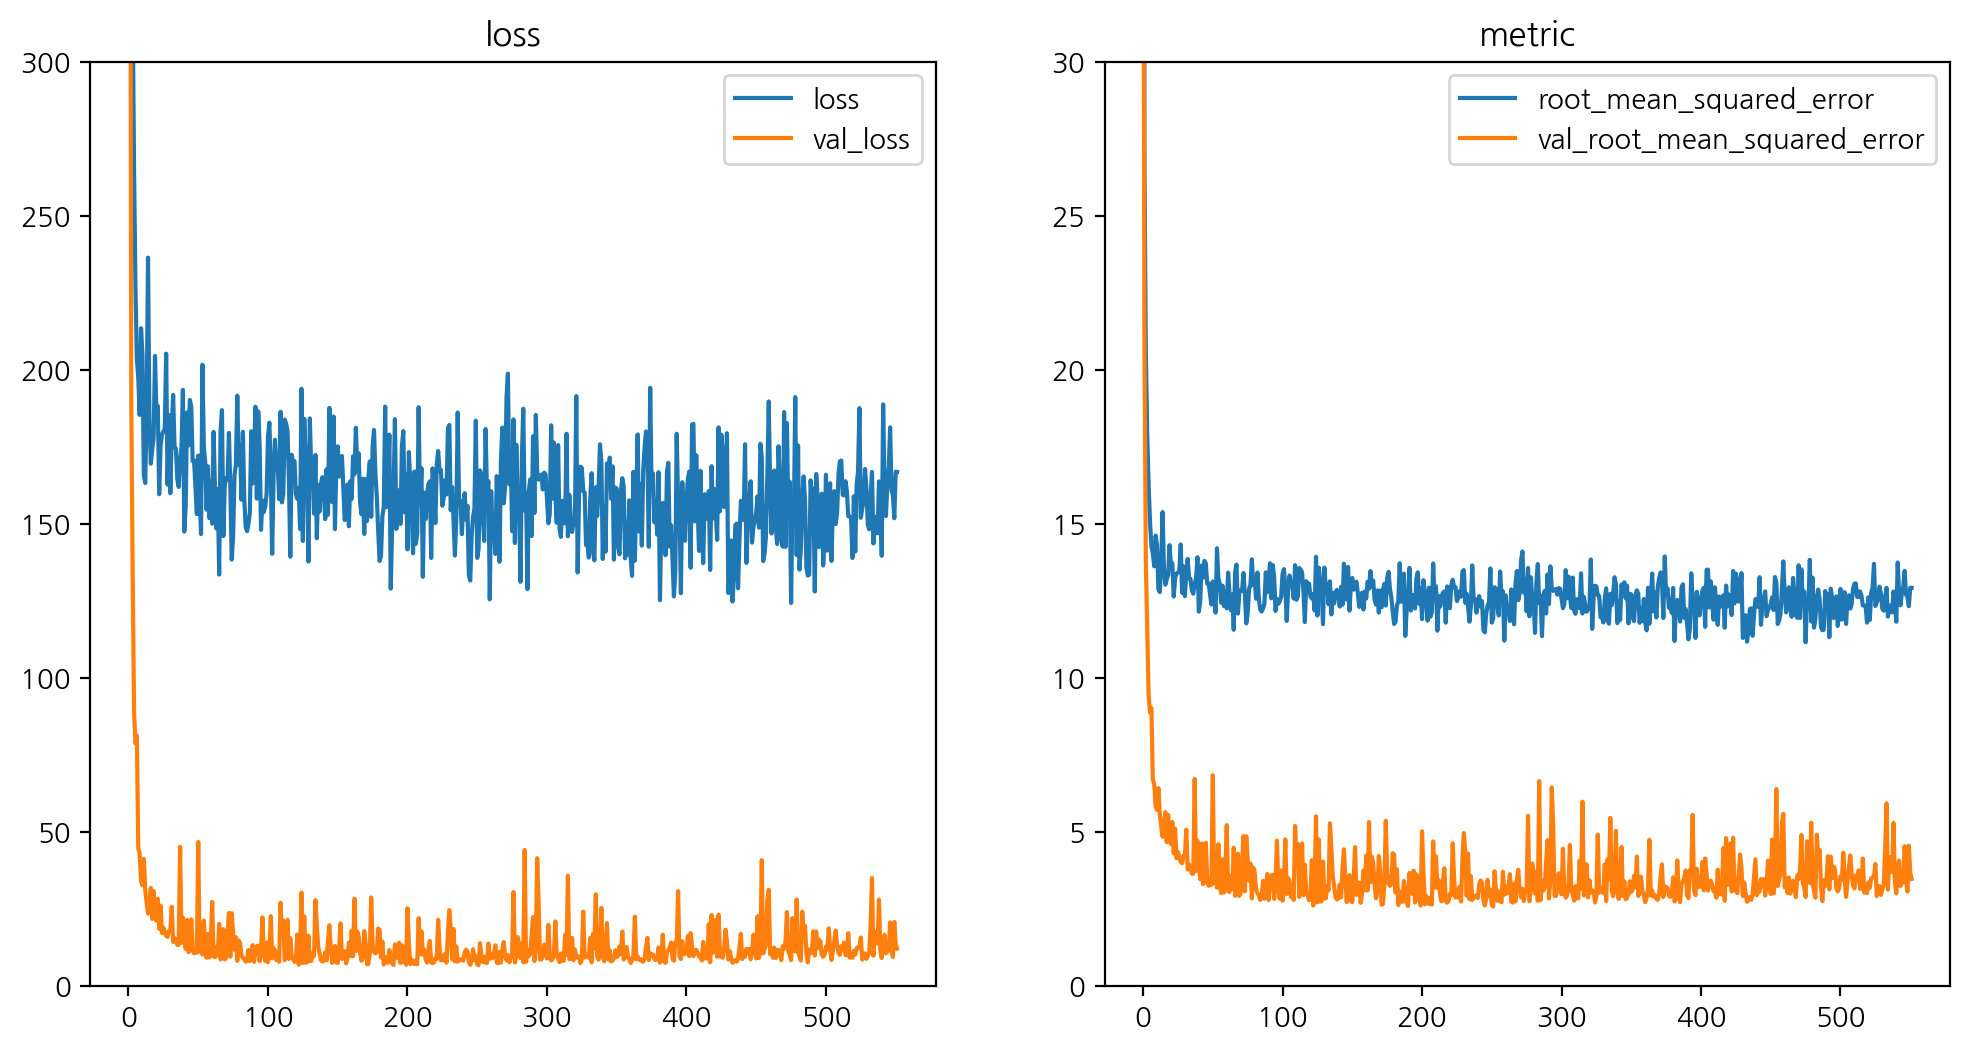

In [871]:
# loss 와 metric 시각화
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))
df_hist[['loss', 'val_loss']].plot(ax=axes[0], title='loss', ylim=[0, 300])
df_hist[['root_mean_squared_error', 'val_root_mean_squared_error']].plot(ax=axes[1], title='metric', ylim=[0, 30]);

In [872]:
# 모델 점수 확인 1번 째는 val_loss: mse, 2번 째는 val_metric: rmse
model.evaluate(X_valid, y_valid)

47/47 [==============================] - 0s 2ms/step - loss: 11.9937 - root_mean_squared_error: 3.4632


[11.99373722076416, 3.4631974697113037]

In [873]:
# rmse 는 2번 째이므로 [1]로 지정
rmse = model.evaluate(X_valid, y_valid)[1]

47/47 [==============================] - 0s 3ms/step - loss: 11.9937 - root_mean_squared_error: 3.4632


In [874]:
# 실제 test 데이터 넣고 예측
y_predict = model.predict(X_test).flatten()
y_predict

235/235 [==============================] - 0s 2ms/step


array([171.35915 , 184.90915 ,  52.904816, ..., 130.48698 ,  30.71393 ,
       179.42657 ], dtype=float32)

In [875]:
# OMR 카드 작성
submission['Calories_Burned'] = y_predict

In [876]:
# 점수를 제출 파일 이름으로
submission_name = f'submit_tf_{rmse: .2f}.csv'

In [877]:
# CSV 파일로 만들기
submission.to_csv(submission_name, index=False)

In [878]:
# 다운로드
from google.colab import files

files.download(submission_name)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>